In [110]:
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pipeline as pp
import stats_hc as hc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
importlib.reload(pp)
stopwords_lst = stopwords.words('english')

pp.apply_pipeline(
    "../datasets/sample/raw_copy.csv", 
    [   (pp.Binary_labels(), 'type', 'binary_label'),
        (pp.Clean_data(), 'content'),
        (pp.Clean_author(), 'authors'),
        (pp.Clean_domain(), 'domain'),
        (pp.Tokenizer(), 'content'),
        (pp.Remove_stopwords(stopwords_lst), 'content'),
        (pp.Stem(), 'content'),
    ],
    new_file="../datasets/sample/statistics/data.csv",
    progress_bar=True
)


100%|██████████| 250/250 [00:03<00:00, 81.60it/s] 

finish time: 4.745114326477051


In [112]:
importlib.reload(hc)
Stat = hc.Statistics("../datasets/sample/statistics/data.csv")

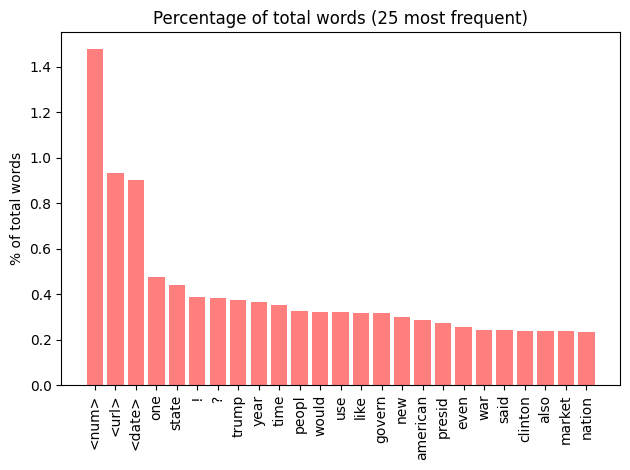

In [113]:
Stat.barplot_word_frequency(nwords=25, percentage=True)

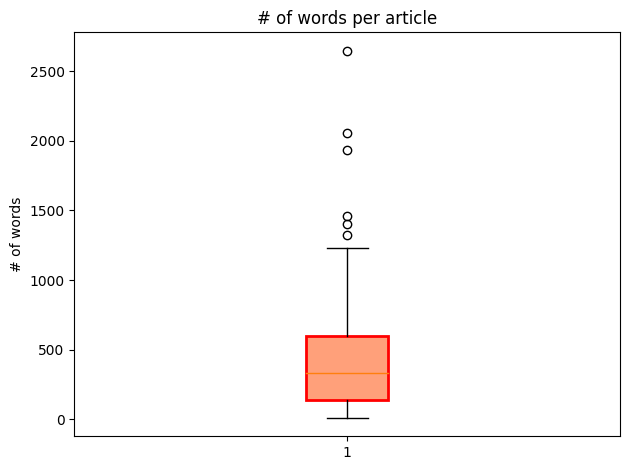

In [114]:
Stat.boxplot_word_frequency()

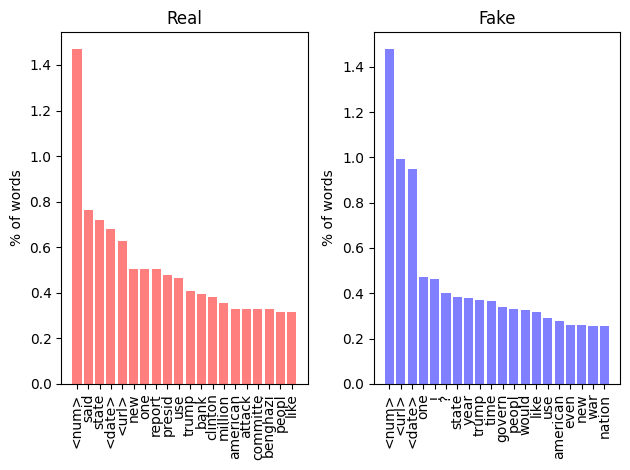

In [115]:
Stat.barplot_word_frequency_fake_vs_real(nwords=20, binary_label="binary_label", percentage=True)

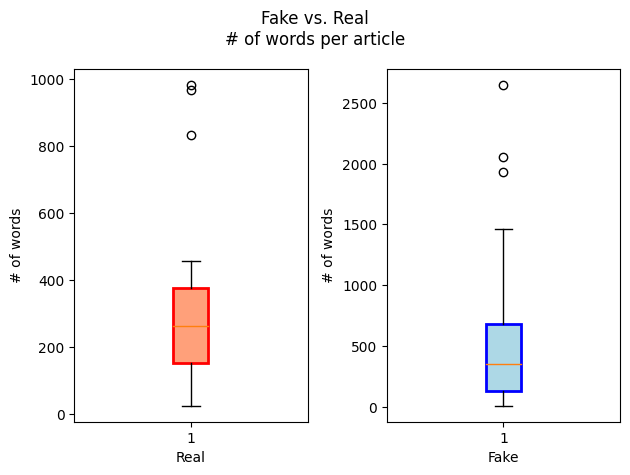

In [116]:
Stat.boxplot_word_frequency_fake_vs_real(binary_label="binary_label")

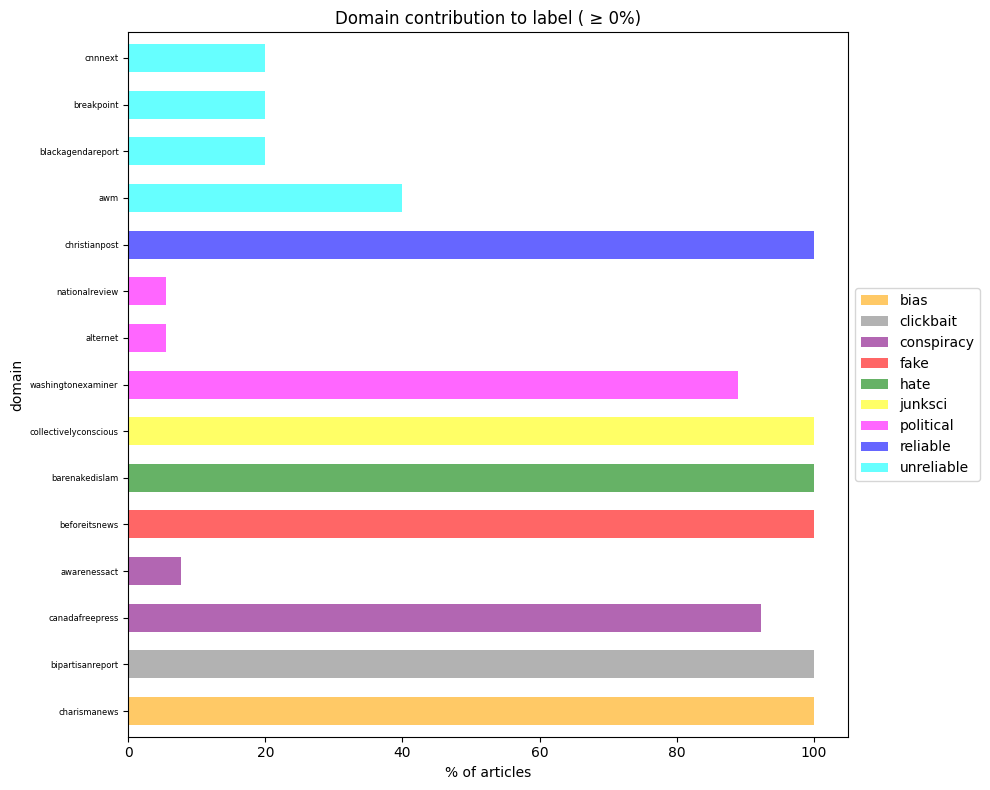

In [117]:
Stat.barplot_domain_contribution(threshold=0, percentage=True)

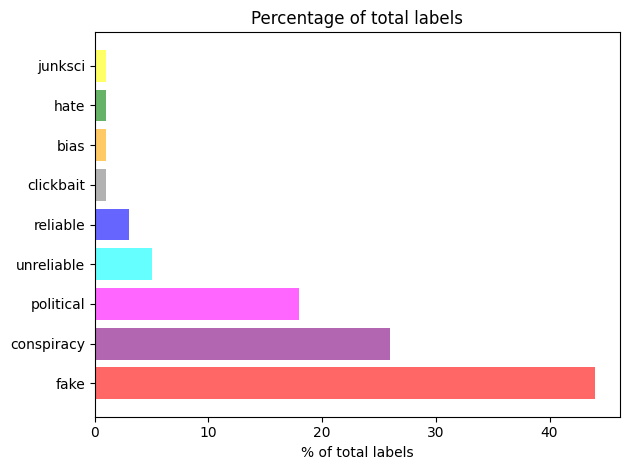

In [118]:
Stat.barplot_type_distribution(percentage = True)

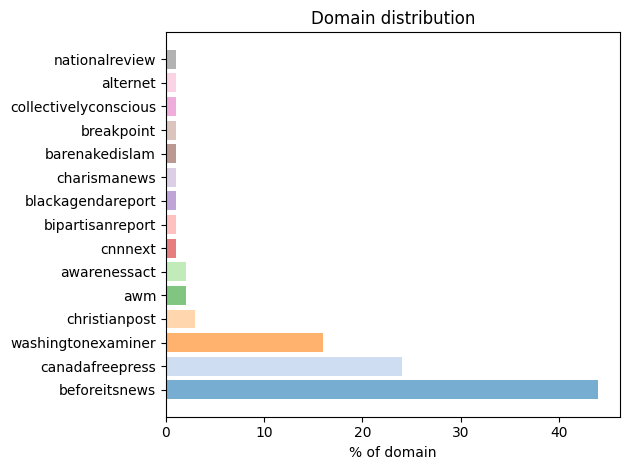

In [119]:
Stat.barplot_domain_distribution(percentage = True)

In [120]:
Stat.barplot_authors_contribution(threshold=1)

c:\projects\FakeNews\FakeNews\src\stats_hc.py:171: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


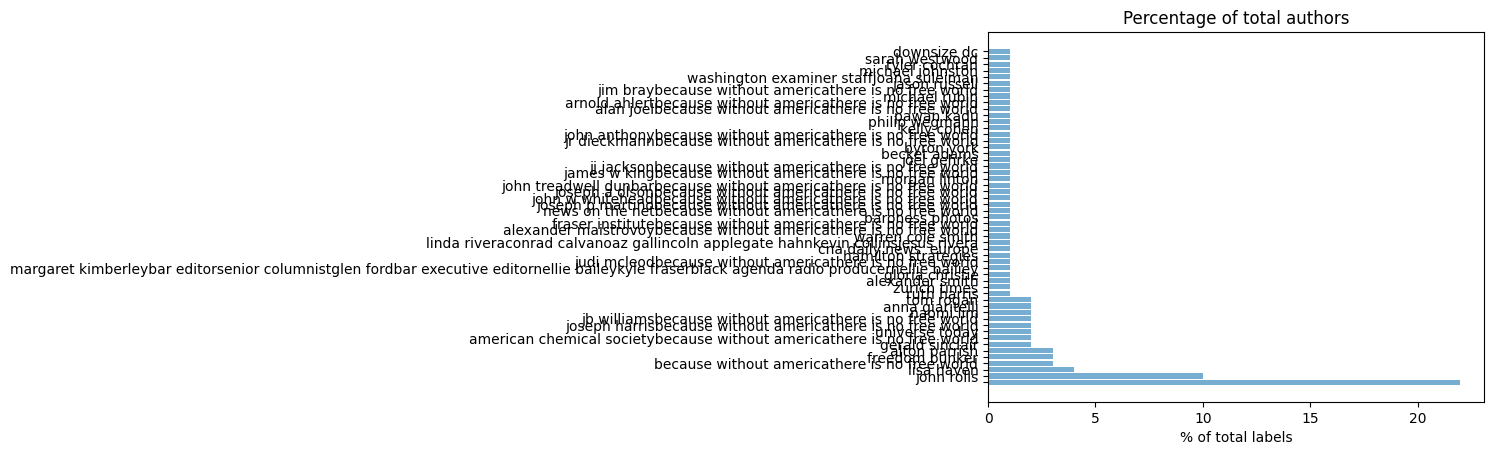

In [ ]:
Stat.barplot_authors_distribution(percentage = True)

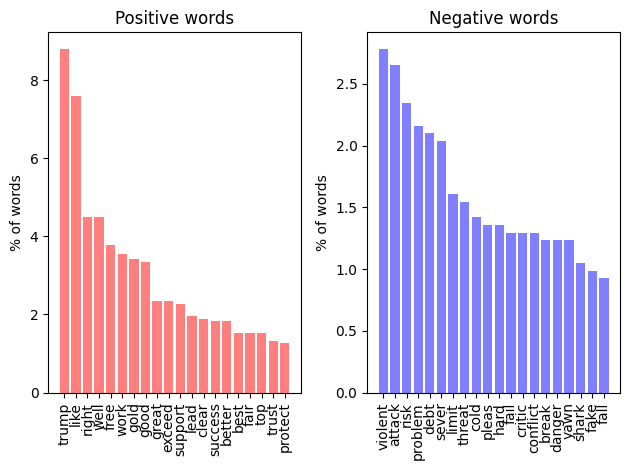

In [ ]:
Stat.barplot_pos_vs_neg_in_fake(nwords=20, binary_label="binary_label", percentage=False)

In [ ]:
Stat.barplot_pos_vs_neg_in_real(nwords=20, binary_label="binary_label", percentage=False)